In [78]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import numpy as np
import sys
import scipy
sys.path.append('../datasets')
sys.path.append('../optimization')
sys.path.append('../util')
import problem as P
from sentiment_analysis_randgen import sm_problem
plt.style.use('bmh')
cm = matplotlib.cm


In [79]:
from compute_quantities_log import compute_hz, compute_Dz
    
def sq_loss(pred,y):
    return (pred-y)**2
    
def eval_mixture(z,lam,DP):
    y = DP.get_true_values()
    h = DP.get_regressor()
    nperdomain=DP.n/DP.p
    
    idx = []
    convexh = np.zeros(DP.n)
    count = 0
    for k in range(DP.p): 
        idx = np.append(idx,range(k*nperdomain, k*nperdomain + int(nperdomain*lam[k])))
        if lam[k]>0:
            convexh += lam[k] * DP.h[:,k]
    idx=idx.astype('int')

    loss_hz = 0
    loss_conv = 0
    loss_hlam = 0
    for x in idx:
        hz = compute_hz(x,z,DP)
        hlam = compute_hz(x,lam,DP)
        loss_hz += sq_loss(hz, y[x])
        loss_hlam += sq_loss(hlam, y[x])
        loss_conv += sq_loss(convexh[x], y[x])
    loss_hz = loss_hz / len(idx)
    loss_hlam = loss_hlam / len(idx)
    loss_conv = loss_conv /len(idx)

    errh = np.zeros(DP.p)
    for k in range(DP.p):
        errh[k] = sum((DP.y[idx]- DP.h[idx,k])**2)/len(idx)

    print 'error hz:', loss_hz ,'error hlam:', loss_hlam ,'error lam mixture h:', loss_conv
    return loss_hz, loss_hlam, loss_conv, errh


In [89]:
datadir = '/data/jhoffman/sentiment_analysis2/'
minO = 2
ngram = 2
split = 2
sources = ['dvd','electronics']
sources_I = 'DE'
z = [0.00458265, 0.99541735]
eta2 = 1e-100


DP_te = sm_problem(datadir=datadir, minO=minO, ngram=ngram,
                    split=split, sources=sources, dset='test', eta=eta2)

zL = []
gL = []

L1= []; L2= []; L3= []; ERRH = []; LAM=[];
for i in xrange(11):
    l0 = np.array((float(i)/10,1-float(i)/10))
    l1,l2,l3, errh  = eval_mixture(z,l0,DP_te)
    L1.append(l1); L2.append(l2); L3.append(l3);
    ERRH.append(errh)
    LAM.append(l0)


error hz: 1.56766645193 error hlam: 1.56766630875 error lam mixture h: 1.58120572133
error hz: 1.53691290153 error hlam: 1.53691916555 error lam mixture h: 1.58300070277
error hz: 1.61906020053 error hlam: 1.61905233238 error lam mixture h: 1.64673844292
error hz: 1.67870429544 error hlam: 1.67899304425 error lam mixture h: 1.73893161414
error hz: 1.69354797136 error hlam: 1.69384412856 error lam mixture h: 1.7804261633
error hz: 1.81065186311 error hlam: 1.81105199389 error lam mixture h: 1.8446922895
error hz: 1.80638350974 error hlam: 1.80703469561 error lam mixture h: 1.88252604496
error hz: 1.77778936211 error hlam: 1.77662227256 error lam mixture h: 1.8939610491
error hz: 1.81303032211 error hlam: 1.81186175402 error lam mixture h: 1.93459015667
error hz: 1.87597083104 error hlam: 1.87606226007 error lam mixture h: 1.95464007147
error hz: 1.85829180264 error hlam: 1.85907831627 error lam mixture h: 1.85907831627


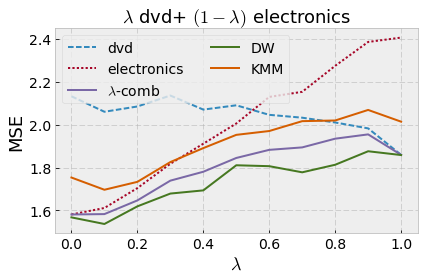

In [90]:
l_list = np.arange(0,1.1,0.1)
matplotlib.rc('xtick',labelsize=14)
matplotlib.rc('ytick',labelsize=14)
alg_names = DP_te.sources + ['$\lambda$-comb', 'DW','KMM']
te_err_l = np.column_stack((ERRH,L3, L1))

# Right now it's computed from another set of scripts,
# so I just read in the final results
KMM_file='../other_alg/split_'+str(split)+'_source_'+sources_I+'_KMM.csv'
KMM_err = np.genfromtxt(KMM_file,delimiter = ',')
te_err_l =  np.column_stack((te_err_l,KMM_err[:,1]))
    

cm = matplotlib.cm
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
na = len(alg_names)
line_sty = ['--',':','-','-','-']
for k in range(na):
    ax.plot(l_list, te_err_l[:,k],line_sty[k],label=alg_names[k],linewidth=2)

ax.legend(fontsize=14,ncol=2)

plt.xlabel('$\lambda$', fontsize = 18)
#plt.ylim([1.2 ,2.4])

plt.ylabel('MSE', fontsize = 18)
plt.title('$\lambda$ '+str(DP_te.sources[0])+'+ $(1-\lambda)$ '+str(DP_te.sources[1]), fontsize = 18)
plt.tight_layout()

plt.savefig('../exp/sa/de_vs_lambda.pdf')


In [91]:
sources = ['kitchen','books']
sources_I = 'KB'
z = [0.97480988, 0.02519012]

DP_te_kb = sm_problem(datadir=datadir, minO=minO, ngram=ngram,
                    split=split, sources=sources, dset='test', eta=eta2)
zL = []
gL = []

L1= []; L2= []; L3= []; ERRH = []; LAM=[];
for i in xrange(11):
    l0 = np.array((float(i)/10,1-float(i)/10))
    l1,l2,l3, errh  = eval_mixture(z,l0,DP_te_kb)
    L1.append(l1); L2.append(l2); L3.append(l3);
    ERRH.append(errh)
    LAM.append(l0)


error hz: 1.71939054451 error hlam: 1.72020144284 error lam mixture h: 1.72111447621
error hz: 1.56873777503 error hlam: 1.56954454301 error lam mixture h: 1.77700977252
error hz: 1.55932332937 error hlam: 1.56012408838 error lam mixture h: 1.76742045687
error hz: 1.51166678593 error hlam: 1.51246011765 error lam mixture h: 1.73962708487
error hz: 1.45643845539 error hlam: 1.45722204615 error lam mixture h: 1.6516039932
error hz: 1.41862386489 error hlam: 1.4193936014 error lam mixture h: 1.61793303347
error hz: 1.41678193735 error hlam: 1.41753200025 error lam mixture h: 1.58257471209
error hz: 1.37802329893 error hlam: 1.37874334562 error lam mixture h: 1.50191898944
error hz: 1.41747548342 error hlam: 1.41790765201 error lam mixture h: 1.48284317149
error hz: 1.44819803468 error hlam: 1.44837319444 error lam mixture h: 1.44847139952
error hz: 1.32910952655 error hlam: 1.32905436274 error lam mixture h: 1.33099886284


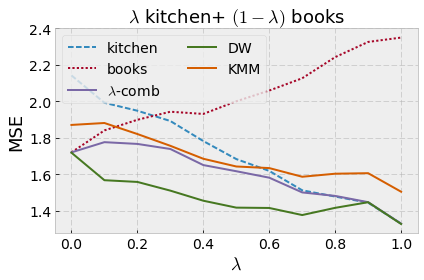

In [92]:
l_list = np.arange(0,1.1,0.1)
matplotlib.rc('xtick',labelsize=14)
matplotlib.rc('ytick',labelsize=14)
alg_names = DP_te_kb.sources + ['$\lambda$-comb', 'DW','KMM']

te_err_l = np.column_stack((ERRH,L3, L1))

# Right now it's computed from another set of scripts,
# so I just read in the final results
KMM_file='../other_alg/split_'+str(split)+'_source_'+sources_I+'_KMM.csv'
KMM_err = np.genfromtxt(KMM_file,delimiter = ',')
te_err_l =  np.column_stack((te_err_l,KMM_err[:,1]))
    

cm = matplotlib.cm
fig = plt.figure(figsize=[6,4])
ax = fig.add_subplot(111)
na = len(alg_names)
line_sty = ['--',':','-','-','-']
for k in range(na):
    ax.plot(l_list, te_err_l[:,k],line_sty[k],label=alg_names[k],linewidth=2)

ax.legend(fontsize=14,ncol=2)

plt.xlabel('$\lambda$', fontsize = 18)
plt.ylabel('MSE', fontsize = 18)
plt.title('$\lambda$ '+str(DP_te_kb.sources[0])+'+ $(1-\lambda)$ '+str(DP_te_kb.sources[1]), fontsize = 18)

plt.tight_layout()

plt.savefig('../exp/sa/kb_vs_lambda.pdf')